Data Visualization -Group 10

1.PALLEBOYINA GOPICHAND -20181CSE0519

2.SUNKARA VIVEK -20181CSE0719

3.AISHWARYA S RAJANAL -20191LCS0016

4.NETHRAVATHI.P-20181CSE0483

5.N.Pulla Reddy -20181CSE0482

Cricket Visualization 

Importing Libraries 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy
import altair as alt

In [47]:
import warnings
warnings.filterwarnings('ignore')

Dataset

In [4]:
odi_data = pd.read_csv('/content/ODIMatchResults_Inn.csv')
odi_data

,team1,runs,Inn,overs,rpo,Date,result,team2,Ground
0,Australia,240,1,50.0,4.80,6 Jan 1985,lost,West Indies,Melbourne
1,West Indies,241,2,44.5,5.37,6 Jan 1985,won,Australia,Melbourne
2,Sri Lanka,239,1,49.0,4.87,8 Jan 1985,lost,Australia,Sydney
3,Australia,240,2,46.2,5.17,8 Jan 1985,won,Sri Lanka,Sydney
4,Sri Lanka,197,1,50.0,3.94,10 Jan 1985,lost,West Indies,Hobart
...,...,...,...,...,...,...,...,...,...
7597,Zimbabwe,218,2,37.3,5.81,6 Mar 2020,lost,Bangladesh,Sylhet
7598,Australia,254,1,50.0,5.08,7 Mar 2020,lost,South Africa,Potchefstroom
7599,South Africa,258,2,45.3,5.67,7 Mar 2020,won,Australia,Potchefstroom
7600,Australia,258,1,50.0,5.16,13 Mar 2020,won,New Zealand,Sydney


In [ ]:
odi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team1   7602 non-null   object 
 1   runs    7602 non-null   int64  
 2   Inn     7602 non-null   int64  
 3   overs   7602 non-null   float64
 4   rpo     7602 non-null   float64
 5   Date    7602 non-null   object 
 6   result  7602 non-null   object 
 7   team2   7602 non-null   object 
 8   Ground  7602 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 534.6+ KB


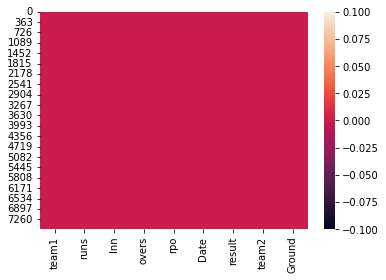

In [5]:
sns.heatmap(odi_data.isnull())

Preparing the Data

In [6]:
odi_data['Year'] = odi_data['Date'].apply(lambda date : date.split(" ")[2])
odi_data['Month']  = odi_data['Date'].apply(lambda date : date.split(" ")[1])
odi_data.drop('Date',axis=1,inplace=True)

In [7]:
odi_data.head()

,team1,runs,Inn,overs,rpo,result,team2,Ground,Year,Month
0,Australia,240,1,50.0,4.80,lost,West Indies,Melbourne,1985,Jan
1,West Indies,241,2,44.5,5.37,won,Australia,Melbourne,1985,Jan
2,Sri Lanka,239,1,49.0,4.87,lost,Australia,Sydney,1985,Jan
3,Australia,240,2,46.2,5.17,won,Sri Lanka,Sydney,1985,Jan
4,Sri Lanka,197,1,50.0,3.94,lost,West Indies,Hobart,1985,Jan


In [8]:
ind_aus = odi_data[((odi_data['team1'] == 'Australia')&(odi_data['team2']== 'India'))|((odi_data['team2'] == 'Australia')&(odi_data['team1']== 'India'))]
ind_aus

,team1,runs,Inn,overs,rpo,result,team2,Ground,Year,Month
62,Australia,163,1,49.3,3.29,lost,India,Melbourne,1985,Mar
63,India,165,2,36.1,4.56,won,Australia,Melbourne,1985,Mar
82,Australia,139,1,42.3,3.27,lost,India,Sharjah,1985,Mar
83,India,140,2,39.2,3.55,won,Australia,Sharjah,1985,Mar
126,India,161,1,43.0,3.74,lost,Australia,Brisbane,1986,Jan
...,...,...,...,...,...,...,...,...,...,...
7555,Australia,258,2,37.4,6.84,won,India,Mumbai,2020,Jan
7556,India,340,1,50.0,6.80,won,Australia,Rajkot,2020,Jan
7557,Australia,304,2,49.1,6.18,lost,India,Rajkot,2020,Jan
7558,Australia,286,1,50.0,5.72,lost,India,Bengaluru,2020,Jan


In [9]:
ind_df = ind_aus[ind_aus['team1']=='India']
aus_df = ind_aus[ind_aus['team1']=='Australia']

In [10]:
ind_aus_inn1 = ind_aus[ind_aus['Inn']==1]
ind_aus_chase = ind_aus[ind_aus['Inn']==2]

In [11]:
ind_df_1st = ind_df[ind_df['Inn']==1]
ind_df_2nd = ind_df[ind_df['Inn']==2]
aus_df_1st = aus_df[aus_df['Inn']==1]
aus_df_2nd = aus_df[aus_df['Inn']==2]

India has been more consistent chasing runs - 275 or above than Australia

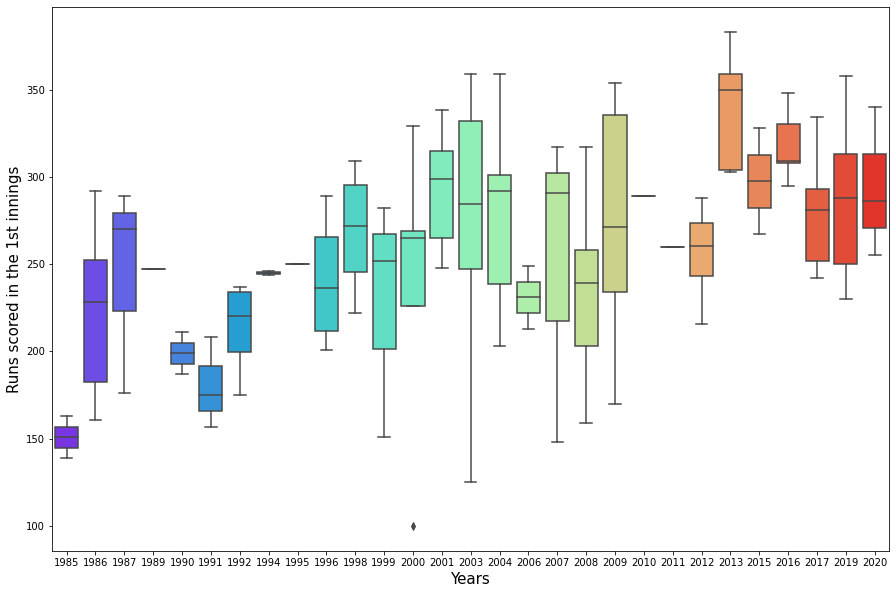

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = 'Year',y = 'runs',data=ind_aus_inn1,palette = 'rainbow');
ax.set_xlabel('Years',fontsize = 15)
ax.set_ylabel('Runs scored in the 1st innings',fontsize=15);

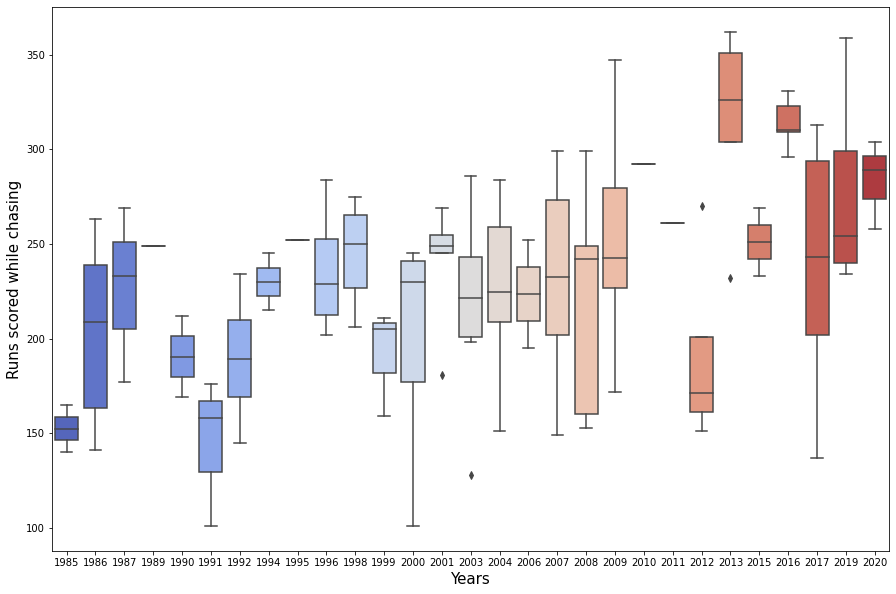

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = 'Year',y = 'runs',data=ind_aus_chase,palette = 'coolwarm');
ax.set_xlabel('Years',fontsize = 15)
ax.set_ylabel('Runs scored while chasing',fontsize=15);

These plots clearly depict that the scoring capablity of the teams in one day cricket has increased with time. Mean batting scores in 1985 used to be 150 which rose to around 300 till 2020.

Trends in Result while batting first in different venues -

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



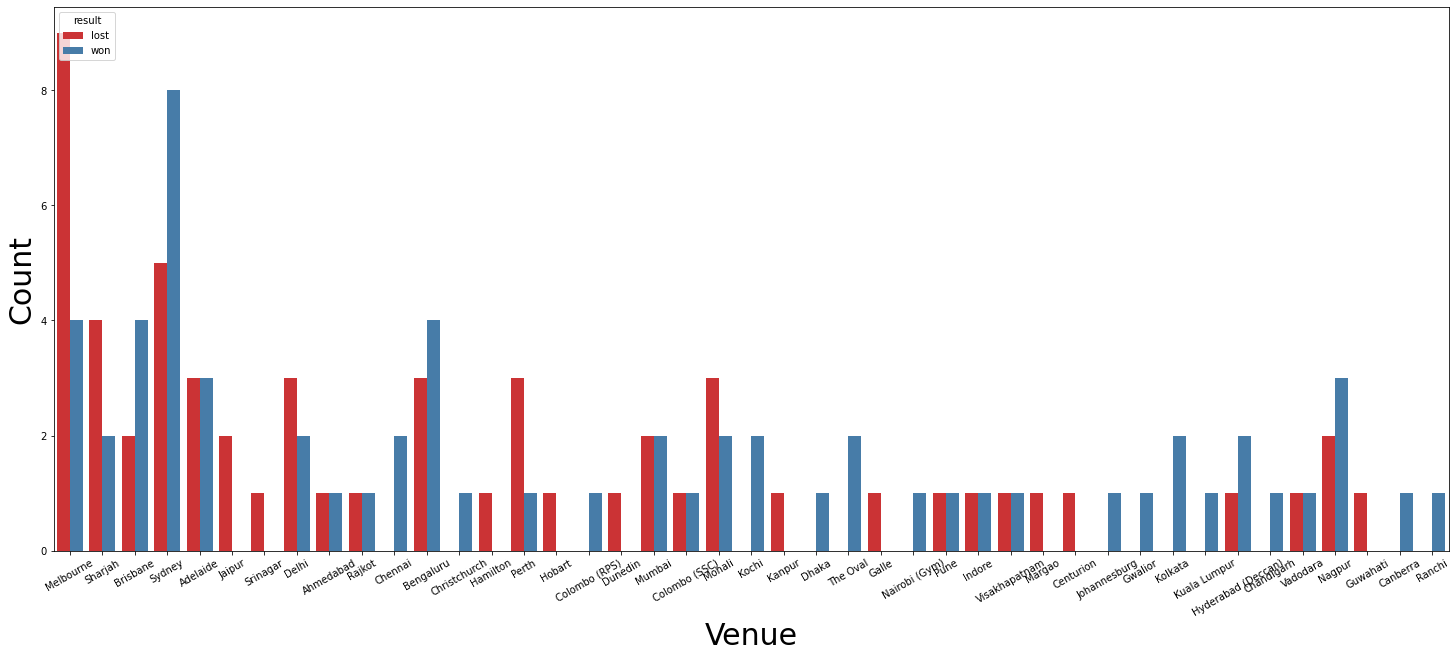

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 30)
sns.countplot('Ground',hue = 'result',data = ind_aus_inn1,palette = 'Set1' )
plt.xlabel('Venue',fontsize = 30)
plt.ylabel('Count',fontsize = 30);

India's runrate while chasing drops below 6 while Aussies have been chasing the runs with higher runrate. Batting in the first inning, both the teams have performed well considering the runrate.

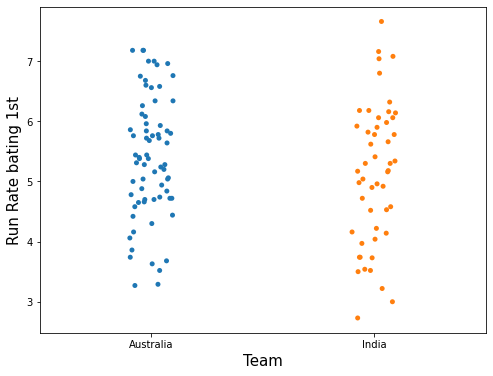

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'team1',y = 'rpo',data = ind_aus_inn1);
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Run Rate bating 1st',fontsize = 15) ;

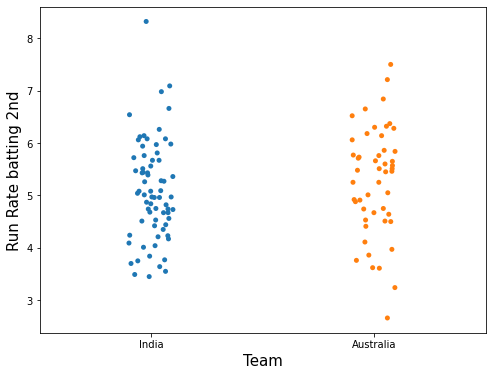

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'team1',y = 'rpo',data = ind_aus_chase);
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Run Rate batting 2nd',fontsize = 15) ;

While India has been consistent at chasing scores at higher runrate(5 - 7 and 7+ on quite many games), Australia has been more consistent in setting the target at high runrate and eventually setting big targets(300+ in 14 matches) as depicted in previous plots.

Results when India bats 1st

In [ ]:
fig = px.pie(ind_df_1st,values = 'Inn',names = 'result')
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Results while India bats 2nd

In [ ]:
fig = px.pie(ind_df_2nd,values = 'Inn',names = 'result')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



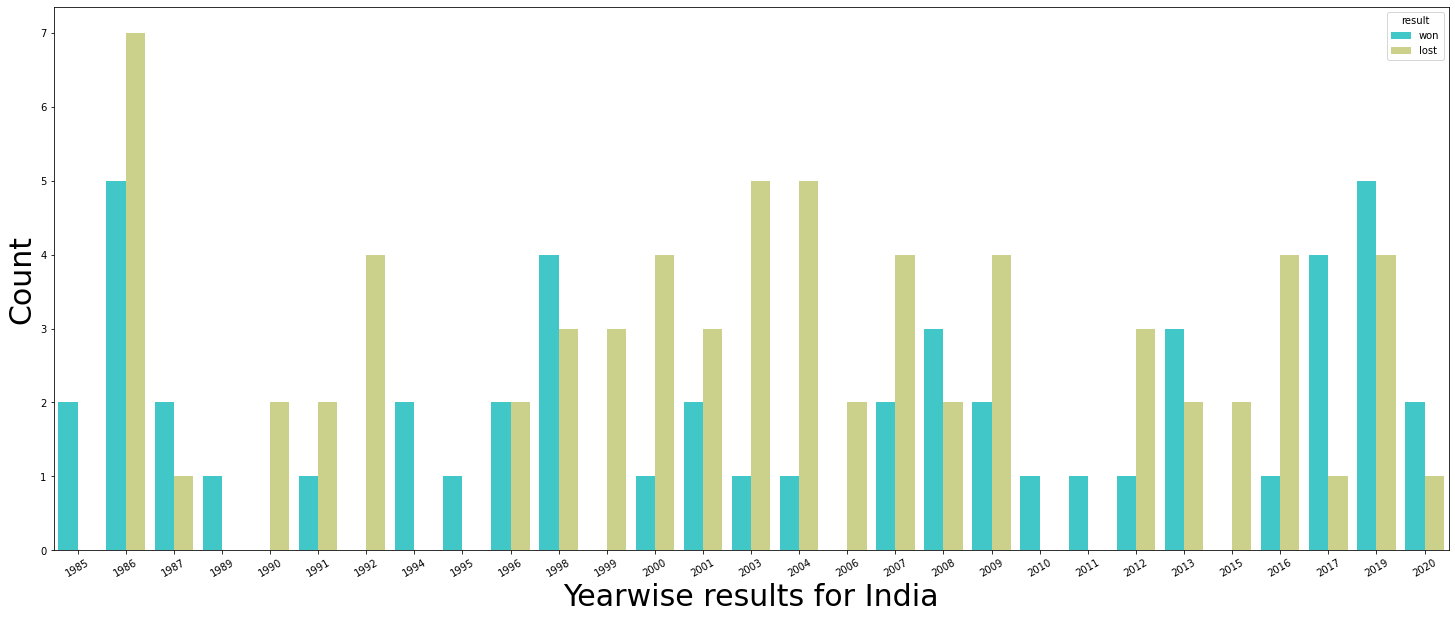

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 30)
sns.countplot('Year',hue = 'result',data = ind_df,palette = 'rainbow' )
plt.xlabel('Yearwise results for India',fontsize = 30)
plt.ylabel('Count',fontsize = 30);

Australia has been a clear boss in the early years of ODI cricket. But in the recent years, India has dethroned Australian dominance from One Day Crciket. However it has been a tough compition over all.

ODI Batting Score Analysis 

Dataset

In [16]:
df = pd.read_csv('ODIs - Batting.csv')
df.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009,2018,189,176,27,5813,124*,124,39.01,6310,92.12,10,36,11,England,1,1,0,1
1,IR Bell (2004-2015),2004-2015,2004,2015,161,157,14,5416,141,141,37.87,7019,77.16,4,35,6,England,1,1,0,0
2,PD Collingwood (2001-2011),2001-2011,2001,2011,197,181,37,5092,120*,120,35.36,6614,76.98,5,26,7,England,1,1,0,0
3,JE Root (2013-2018),2013-2018,2013,2018,121,115,19,4946,133*,133,51.52,5722,86.43,13,29,4,England,1,0,1,0
4,AJ Stewart (1989-2003),1989-2003,1989,2003,170,162,14,4677,116,116,31.6,6841,68.36,4,28,13,England,1,0,0,0


In [17]:
nrows, ncols = df.shape
print(f"There are {nrows} rows and {ncols} columns")

There are 1984 rows and 21 columns


In [18]:
df.columns

Index(['Player', 'Career Span', 'Career Start', 'Career End', 'Matches Played',
       'Innings Batted', 'Not Outs', 'Runs Scored', 'Highest Innings Score',
       'Highest Innings Score Num', 'Batting Avg', 'Balls Faced',
       'Batting Strike Rate', 'Hundreds Scored', 'Scores Of Fifty Or More',
       'Ducks Scored', 'Country', 'Player Count', '5000+ Runs Scored',
       '40+ Batting Avg', '90+ Batting Strike Rate'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Player                     1984 non-null   object
 1   Career Span                1984 non-null   object
 2   Career Start               1984 non-null   int64 
 3   Career End                 1984 non-null   int64 
 4   Matches Played             1984 non-null   int64 
 5   Innings Batted             1984 non-null   object
 6   Not Outs                   1984 non-null   object
 7   Runs Scored                1984 non-null   object
 8   Highest Innings Score      1984 non-null   object
 9   Highest Innings Score Num  1984 non-null   object
 10  Batting Avg                1984 non-null   object
 11  Balls Faced                1984 non-null   object
 12  Batting Strike Rate        1984 non-null   object
 13  Hundreds Scored            1984 non-null   object
 14  Scores O

In [20]:
# Let's change the objects to numbers
df['Innings Batted'] = pd.to_numeric(df['Innings Batted'], errors='coerce')
df['Not Outs'] = pd.to_numeric(df['Not Outs'], errors='coerce')
df['Runs Scored'] = pd.to_numeric(df['Runs Scored'], errors='coerce')
df['Batting Avg'] = pd.to_numeric(df['Batting Avg'], errors='coerce')
df['Balls Faced'] = pd.to_numeric(df['Balls Faced'], errors='coerce')
df['Batting Strike Rate'] = pd.to_numeric(df['Batting Strike Rate'], errors='coerce')
df['Hundreds Scored'] = pd.to_numeric(df['Hundreds Scored'], errors='coerce')
df['Scores Of Fifty Or More'] = pd.to_numeric(df['Scores Of Fifty Or More'], errors='coerce')
df['Ducks Scored'] = pd.to_numeric(df['Ducks Scored'], errors='coerce')

In [21]:
country_df = df.groupby('Country')

In [22]:
df['Country'].unique()

array(['England', 'Australia', 'South Africa', 'West Indies',
       'New Zealand', 'India', 'Pakistan', 'Sri Lanka', 'Zimbabwe',
       'Bangladesh', 'Ireland', 'Afghanistan'], dtype=object)

In [23]:
# country_df['Runs Scored'].max()
idx = country_df['Runs Scored'].transform(max) == df['Runs Scored']
country_top_scorers = df[idx]

In [24]:
country_top_scorers

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009,2018,189,176.0,27.0,5813.0,124*,124,39.01,6310.0,92.12,10.0,36.0,11.0,England,1,1,0,1
251,RT Ponting (1995-2012),1995-2012,1995,2012,374,364.0,39.0,13589.0,164,164,41.81,16944.0,80.19,29.0,82.0,20.0,Australia,1,1,1,0
477,JH Kallis (1996-2014),1996-2014,1996,2014,323,309.0,53.0,11550.0,139,139,45.11,15793.0,73.13,17.0,86.0,17.0,South Africa,1,1,1,0
606,BC Lara (1990-2007),1990-2007,1990,2007,295,285.0,32.0,10348.0,169,169,40.90,12996.0,79.62,19.0,62.0,14.0,West Indies,1,1,1,0
794,SP Fleming (1994-2007),1994-2007,1994,2007,279,268.0,21.0,8007.0,134*,134,32.41,11214.0,71.40,8.0,49.0,17.0,New Zealand,1,1,0,0
989,SR Tendulkar (1989-2012),1989-2012,1989,2012,463,452.0,41.0,18426.0,200*,200,44.83,21367.0,86.23,49.0,96.0,20.0,India,1,1,1,0
1213,Inzamam-ul-Haq (1991-2007),1991-2007,1991,2007,375,348.0,52.0,11701.0,137*,137,39.53,15769.0,74.20,10.0,83.0,20.0,Pakistan,1,1,0,0
1431,KC Sangakkara (2000-2015),2000-2015,2000,2015,397,373.0,40.0,13975.0,169,169,41.96,17715.0,78.88,25.0,90.0,15.0,Sri Lanka,1,1,1,0
1619,A Flower (1992-2003),1992-2003,1992,2003,213,208.0,16.0,6786.0,145,145,35.34,9097.0,74.59,4.0,55.0,13.0,Zimbabwe,1,1,0,0
1758,Tamim Iqbal (2007-2018),2007-2018,2007,2018,186,184.0,8.0,6450.0,154,154,36.64,8254.0,78.14,11.0,44.0,16.0,Bangladesh,1,1,0,0


In [27]:
# Top Scorers by Country
country_top_scorers['Labels'] = country_top_scorers["Player"].map(str) + ', ' + country_top_scorers["Country"].map(str)

country_top_scorers_chart = alt.Chart(country_top_scorers).mark_bar().encode(
    x='Runs Scored:Q',
    y=alt.Y('Labels:N', sort=alt.Sort(field="Runs Scored", op="sum", order='descending'), title='Player'),
    color=alt.Color('Batting Avg:Q', scale=alt.Scale(scheme='greenblue'))
).configure_axis(labelLimit=300)


In [28]:
country_top_scorers_chart

alt.Chart(...)

In [29]:
# Max Hundreds by Country
idx = country_df['Hundreds Scored'].transform(max) == df['Hundreds Scored']
country_top_hundreds = df[idx]
country_top_hundreds['Labels'] = country_top_hundreds["Player"].map(str) + ', ' + country_top_hundreds["Country"].map(str)

country_top_hundreds_chart = alt.Chart(country_top_hundreds).mark_bar().encode(
    x='Hundreds Scored:Q',
    y=alt.Y('Labels:N', sort=alt.Sort(field="Hundreds Scored", op="sum", order='descending'), title='Player'),
    color=alt.Color('Batting Avg:Q', scale=alt.Scale(scheme='greenblue'))
).configure_axis(labelLimit=300)

In [30]:
country_top_hundreds_chart

alt.Chart(...)

In [31]:
top_players = df.sort_values('Runs Scored', ascending=False)
top_players = top_players.head(25)

runs_base = alt.Chart(top_players).encode(
    x=alt.X('Runs Scored:Q'),
    y=alt.Y('Player', sort=alt.Sort(field="Runs Scored", op="count", order='ascending')),
    tooltip=['Matches Played', 'Batting Strike Rate', 'Hundreds Scored']
)

avg_bars = runs_base.mark_bar().encode(
    color='Batting Avg:Q',
)

str_bars = runs_base.mark_bar().encode(
    color=alt.Color('Batting Strike Rate:Q', scale=alt.Scale(scheme='greens'))
)

text1 = runs_base.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Batting Avg:Q'
)

text2 = runs_base.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Batting Strike Rate:Q'
)

chart1 = (avg_bars + text1)
chart2 = (str_bars + text2)
top_scorers_chart = alt.vconcat(chart1, chart2).resolve_scale(color='independent')

In [32]:
top_scorers_chart

alt.VConcatChart(...)

In [34]:
top_players = top_players.head(25)

base = alt.Chart(top_players).encode(
    x=alt.X('Runs Scored:Q'),
    y=alt.Y('Player', sort=alt.Sort(field="Runs Scored", op="count", order='ascending')),
    tooltip=['Matches Played', 'Batting Strike Rate', 'Hundreds Scored']
)

bars = base.mark_bar().encode(
    color='Country:N',
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Country:N'
)

top_scorers_country_chart = bars + text

In [35]:
top_scorers_country_chart

alt.LayerChart(...)

In [36]:
india_df = df[df['Country']=="India"]
india_df.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
989,SR Tendulkar (1989-2012),1989-2012,1989,2012,463,452.0,41.0,18426.0,200*,200,44.83,21367.0,86.23,49.0,96.0,20.0,India,1,1,1,0
990,SC Ganguly (1992-2007),1992-2007,1992,2007,308,297.0,23.0,11221.0,183,183,40.95,15235.0,73.65,22.0,71.0,16.0,India,1,1,1,0
991,R Dravid (1996-2011),1996-2011,1996,2011,340,314.0,39.0,10768.0,153,153,39.15,15126.0,71.18,12.0,82.0,13.0,India,1,1,0,0
992,V Kohli (2008-2018),2008-2018,2008,2018,216,208.0,37.0,10232.0,183,183,59.83,11016.0,92.88,38.0,48.0,12.0,India,1,1,1,1
993,MS Dhoni (2004-2018),2004-2018,2004,2018,329,278.0,77.0,9999.0,183*,183,49.74,11435.0,87.44,9.0,67.0,9.0,India,1,1,1,0


In [37]:
alt.themes.enable('opaque')

top_players = df.sort_values('Runs Scored', ascending=False)
test = top_players.head(25)
test['Player'] = test['Player'].str[:-11]
test.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
989,SR Tendulkar,1989-2012,1989,2012,463,452.0,41.0,18426.0,200*,200,44.83,21367.0,86.23,49.0,96.0,20.0,India,1,1,1,0
1431,KC Sangakkara,2000-2015,2000,2015,397,373.0,40.0,13975.0,169,169,41.96,17715.0,78.88,25.0,90.0,15.0,Sri Lanka,1,1,1,0
251,RT Ponting,1995-2012,1995,2012,374,364.0,39.0,13589.0,164,164,41.81,16944.0,80.19,29.0,82.0,20.0,Australia,1,1,1,0
1432,ST Jayasuriya,1989-2011,1989,2011,441,429.0,18.0,13364.0,189,189,32.51,14644.0,91.25,28.0,68.0,34.0,Sri Lanka,1,1,0,1
1433,DPMD Jayawardene,1998-2015,1998,2015,443,413.0,38.0,12381.0,144,144,33.01,15736.0,78.67,18.0,75.0,28.0,Sri Lanka,1,1,0,0


In [38]:
alt.themes.enable('opaque')

base = alt.Chart(test).encode(
    alt.X('Batting Avg:Q', bin=alt.Bin(maxbins=40), title='Batting Average'),
    alt.Y('Batting Strike Rate:Q', bin=alt.Bin(maxbins=40), title='Batting Strike Rate'),
    tooltip=['Player']
)

bars = base.mark_circle().encode(
    size='Runs Scored:Q',
    color='Country:N',
)

text = base.mark_text(
    align='left',
    baseline='middle',
    fontSize=8,
    dy=5,
    dx=10  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Player:N'
)

chart_bubble_top = (bars + text).configure_scale(maxFontSize=4).properties(height=700, width=700)

In [39]:
chart_bubble_top

alt.LayerChart(...)

In [40]:
india_top_df = india_df.head(25)
base = alt.Chart(india_top_df).encode(
    x=alt.X('Runs Scored:Q', title='Runs Scored with Strike Rate labels and Mean (red line)'),
    y=alt.Y('Player', sort=alt.Sort(field="Runs Scored", op="count", order='ascending')),
    tooltip=['Matches Played', 'Batting Strike Rate', 'Hundreds Scored']
)

bars = base.mark_bar().encode(
    color='Batting Avg:Q'
)

rule = alt.Chart(india_top_df).mark_rule(color='red').encode(
    x='mean(Runs Scored):Q'
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Batting Strike Rate:Q'
)

india_top_chart = (bars + text + rule).configure_scale(bandPaddingInner=0.2).configure_legend(padding=20)

In [41]:
india_top_chart

alt.LayerChart(...)

In [45]:
innings = alt.Chart(bangladesh_top_df.head(7)).mark_point().encode(
    x=alt.X('Innings Batted:Q', 
        scale=alt.Scale(zero=False)),
    y='Runs Scored:Q',
    tooltip=['Player']
)

text = innings.mark_text(
    align='left',
    baseline='top',
    dx=10,
    dy=-5,
    angle=20
).encode(
    text='Player:N'
)

(innings + text).configure_axis(labelOverlap=True)

alt.LayerChart(...)

In [ ]:
innings = alt.Chart(india_df).mark_point().encode(
    x='Innings Batted:Q',
    y='Runs Scored:Q',
    color='Innings Batted:Q',
    tooltip=['Player']
)

rule = alt.Chart(india_df).mark_rule(color='red').encode(
    y='mean(Runs Scored):Q'
)

balls = alt.Chart(india_df).mark_point().encode(
    x='Balls Faced:Q',
    y='Runs Scored:Q',
    color='Innings Batted:Q',
    tooltip=['Player']
)

(innings+rule) | balls

alt.HConcatChart(...)